# Machine Learning Project
### Fall 2023
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [4]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1
**Question**:
How do the selected variables, such as previous cancellations, the number of adults and children, room price, and lead time, correlate with each other in the context of hotel reservations? What insights can be derived from the correlation heatmap regarding the interplay of these factors and their potential impact on booking outcomes?

**Answer**:

In the context of the heatmap that delves into the intricate relationships among various parameters within the dataset, certain correlations stand out as key contributors to the booking status outcome. Notably, the negative correlation between room price and lead days signifies that as lead time increases, room prices tend to decrease, potentially influencing customers' decision to cancel or not. Additionally, the negative correlation between special requests and lead time suggests that as lead time extends, the number of special requests tends to decline, hinting at a potential factor influencing reservation cancellations. Furthermore, the positive correlation between room price and the number of children underscores the significance of room pricing in families' booking decisions. Understanding these nuanced connections equips the hotel management with insights to refine pricing strategies, customer services, and lead time management to curtail cancellations, thus fortifying booking status outcomes and revenue stability.

## Supporting Analysis

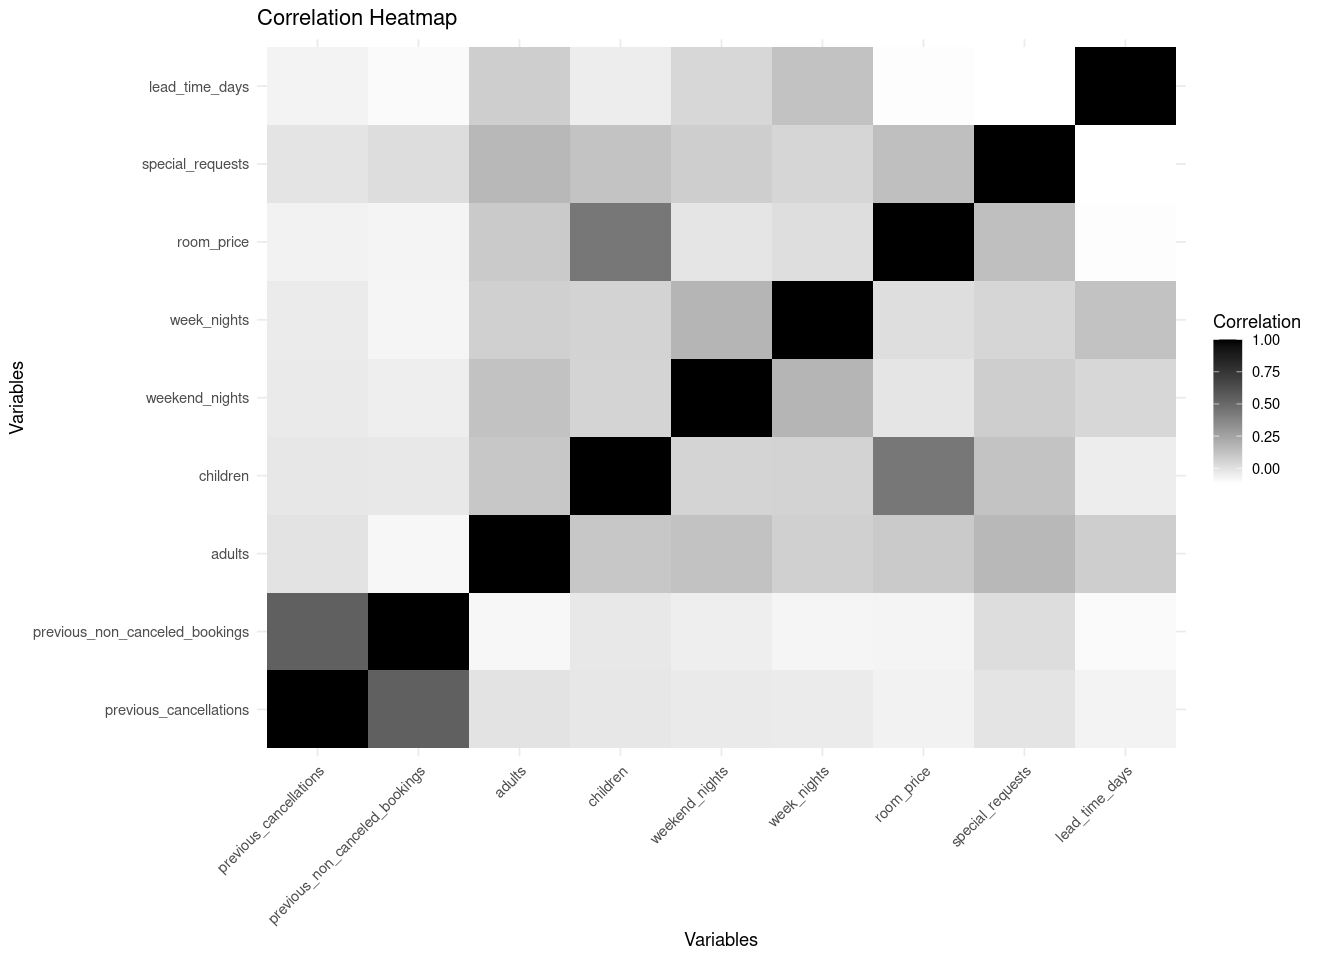

In [12]:
# Load necessary libraries
library(ggplot2)
library(reshape2)

# Calculate the correlation matrix
correlation_matrix <- cor(bookings_df[, c("previous_cancellations", "previous_non_canceled_bookings", "adults", "children", "weekend_nights", "week_nights", "room_price", "special_requests", "lead_time_days")])

# Convert the correlation matrix to a data frame
correlation_data <- as.data.frame(as.table(correlation_matrix))

# Rename the columns for clarity
colnames(correlation_data) <- c("Variable1", "Variable2", "Correlation")

# Create a correlation heatmap
ggplot(correlation_data, aes(Variable1, Variable2, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black") +
  labs(title = "Correlation Heatmap",
       x = "Variables", y = "Variables") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))










In [7]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

## Question 2
**Question**:
What is the distribution of reservation outcomes (canceled and not canceled) for different room types, and how does the ratio of not-canceled to canceled reservations vary across room types?

**Answer**:

The graph highlights that the "Suite" room type experiences a significant number of cancellations, possibly due to its popularity among customers. However, further analysis reveals that the "Executive Suite" has a particularly high cancellation ratio of 0.96, indicating a higher likelihood of reservations being canceled compared to other room types. This discrepancy could be attributed to factors such as pricing, reservation policies, or customer preferences. While other room types exhibit relatively similar cancellation ratios, the "Executive Suite" stands out. This insight can guide the hotel's management in tailoring their strategies for the "Executive Suite," potentially through adjusted pricing, marketing efforts, or enhanced cancellation policies, to reduce the cancellation rate and optimize revenue and occupancy. Understanding these patterns is essential for effective decision-making in the hotel industry.


## Supporting Analysis

`summarise()` has grouped output by 'room_type', 'booking_status'. You can
override using the `.groups` argument.
New names:
• `` -> `...1`


room_type,ratio
<fct>,<dbl>
studio,1.9588015
suite,1.9745709
presidential_suite,1.9666667
executive_suite,0.9647059


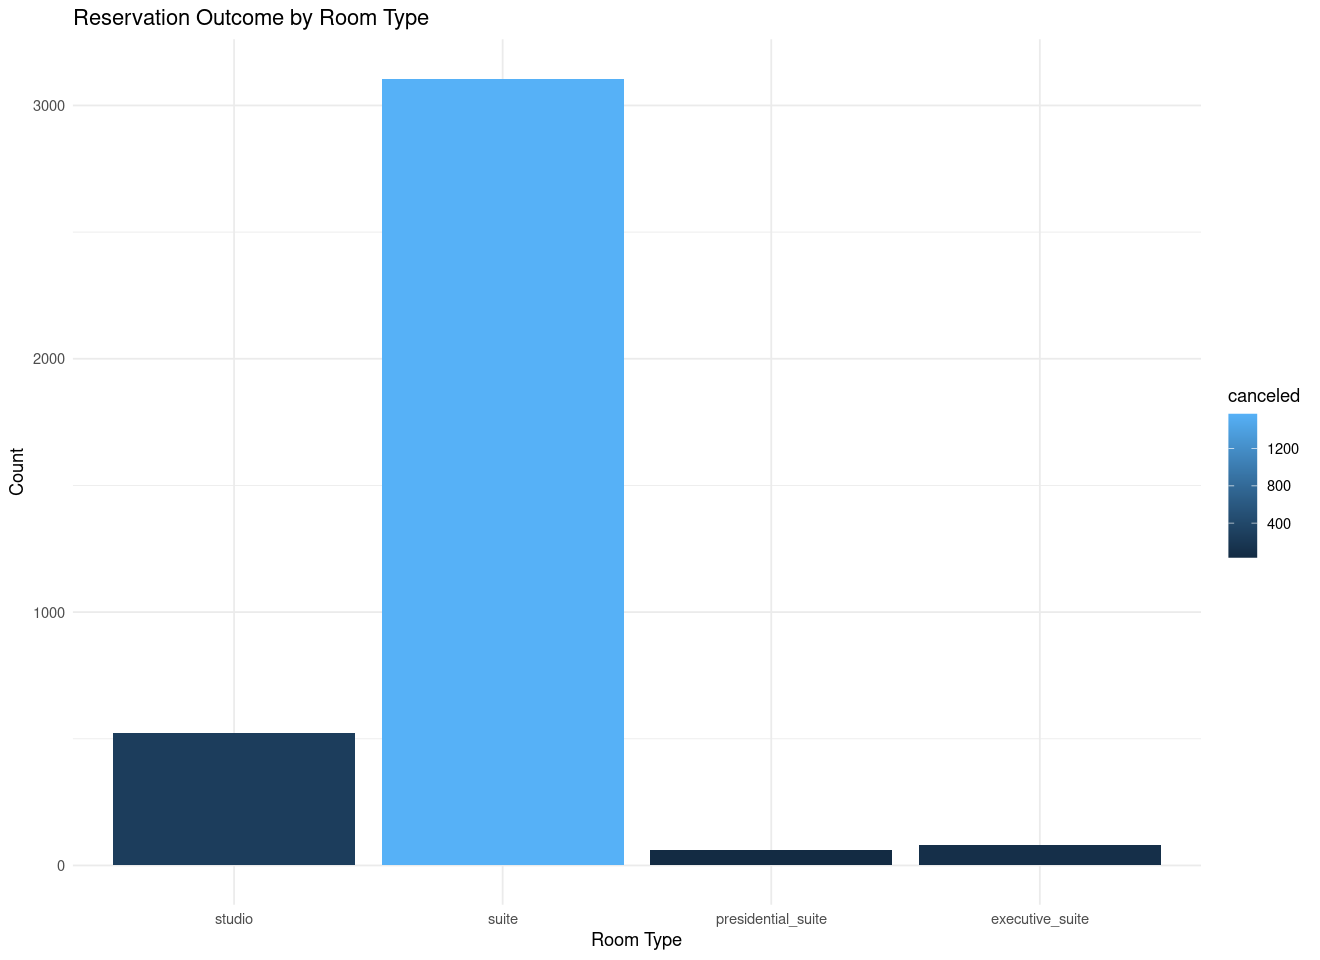

In [8]:
# Load the necessary libraries
library(dplyr)
library(ggplot2)

# Ensure that booking_status is a factor variable
bookings_df$booking_status <- as.factor(bookings_df$booking_status)

# Summary data frame
room_type_summary <- bookings_df %>%
  group_by(room_type, booking_status, .groups = "drop") %>%
  summarise(count = n()) %>%
  pivot_wider(names_from = booking_status, values_from = count, values_fill = 0) %>%
  mutate(ratio = not_canceled / canceled)

# Stacked bar chart
ggplot(room_type_summary, aes(x = room_type, y = not_canceled, fill = canceled)) +
  geom_bar(stat = "identity") +
  labs(title = "Reservation Outcome by Room Type",
       x = "Room Type", y = "Count") +
  theme_minimal()

# Display the ratio
room_type_summary %>% select(room_type, ratio)


## Question 3


**Question**:

How does lead time in advance of booking relate to room price, and is there an observable difference in booking status, particularly in terms of cancellations and non-cancellations? What insights can be derived from this relationship?

**Answer**:
In the plotted graph, a relationship between room price and lead days (the number of days in advance a room is booked) is examined. The graph reveals a notable insight: when reservations are made with a lead time of 0-100 days, the total number of cancellations is relatively low. However, as room prices increase and lead days extend beyond this range, the rate of cancellations rises accordingly.

This observation suggests that customers who book rooms well in advance, typically within the 0-100 day range, exhibit a higher commitment to their reservations and are less likely to cancel. On the other hand, as room prices increase and lead times extend, there might be a different customer segment that is more price-sensitive and potentially more prone to cancellation.

## Supporting Analysis

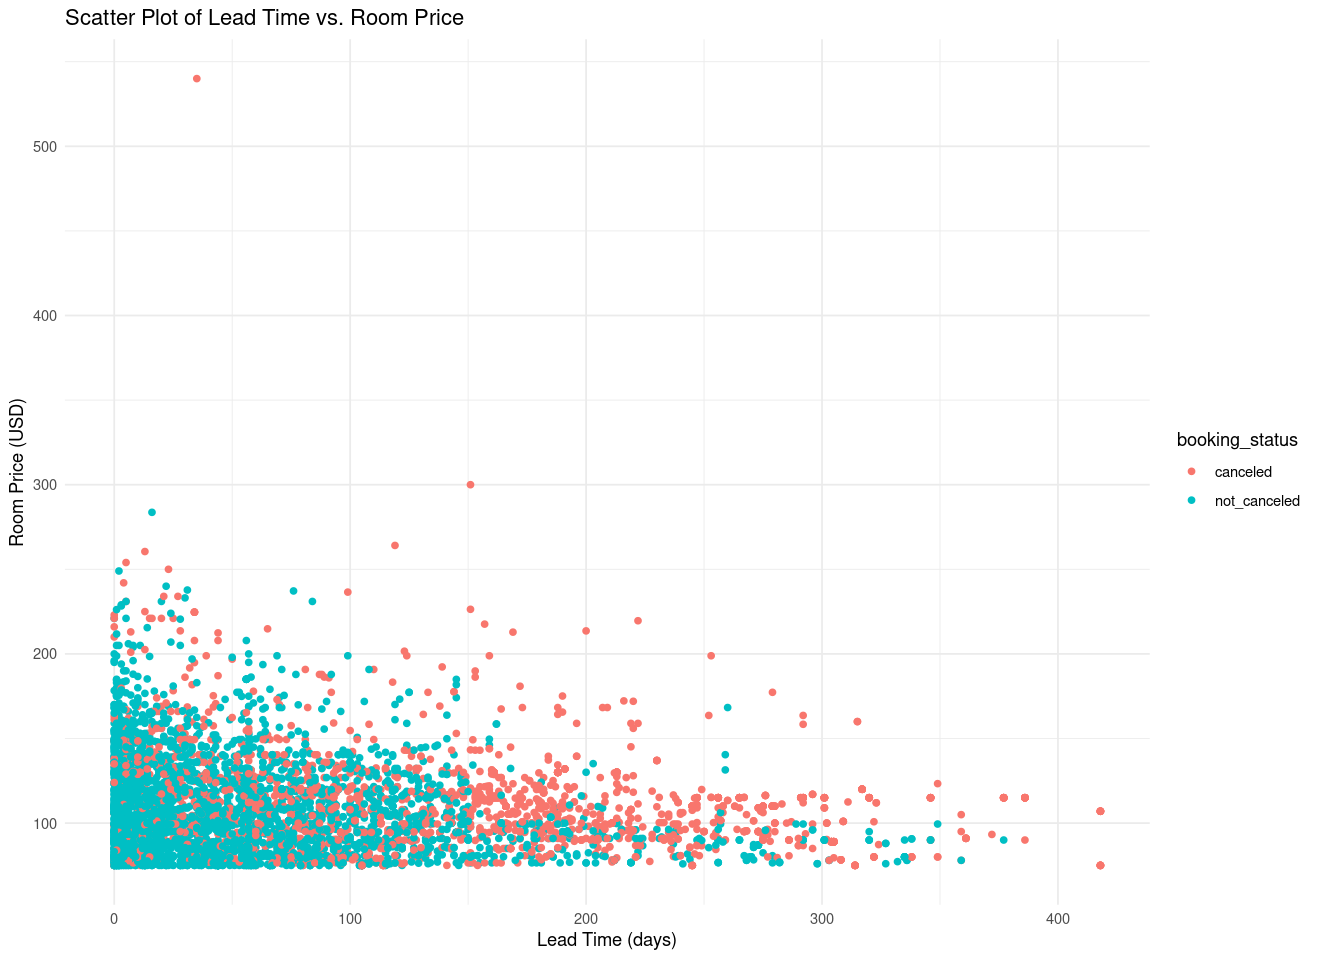

In [12]:
# Load the necessary libraries
library(dplyr)
library(ggplot2)

# Scatter plot
ggplot(bookings_df, aes(x = lead_time_days, y = room_price, color = booking_status)) +
  geom_point() +
  labs(title = "Scatter Plot of Lead Time vs. Room Price",
       x = "Lead Time (days)", y = "Room Price (USD)") +
  theme_minimal()




## Question 4


**Question**:

How do different arrival seasons influence reservation outcomes, particularly in terms of cancellations and non-cancellations? What insights can be derived from this seasonal analysis?

**Answer**:
The graph comparing cancellations across seasons reveals a significant number of cancellations during the moderate season. However, this high cancellation count might be linked to a larger volume of bookings during that season. To gain a more nuanced perspective, cancellation ratios were computed, yielding valuable insights. During the low season, the cancellation rate is notably low, with a ratio of 3.9, indicating a strong commitment to bookings. In contrast, the peak season witnesses a higher cancellation rate with a ratio of 1.29, despite a higher overall booking volume. These insights highlight the influence of seasonality on booking behavior. They can guide strategic decisions related to pricing, occupancy, and policies, tailored to different seasons, ultimately optimizing revenue management and customer satisfaction.


## Supporting Analysis


`summarise()` has grouped output by 'arrival_occupancy_season'. You can
override using the `.groups` argument.


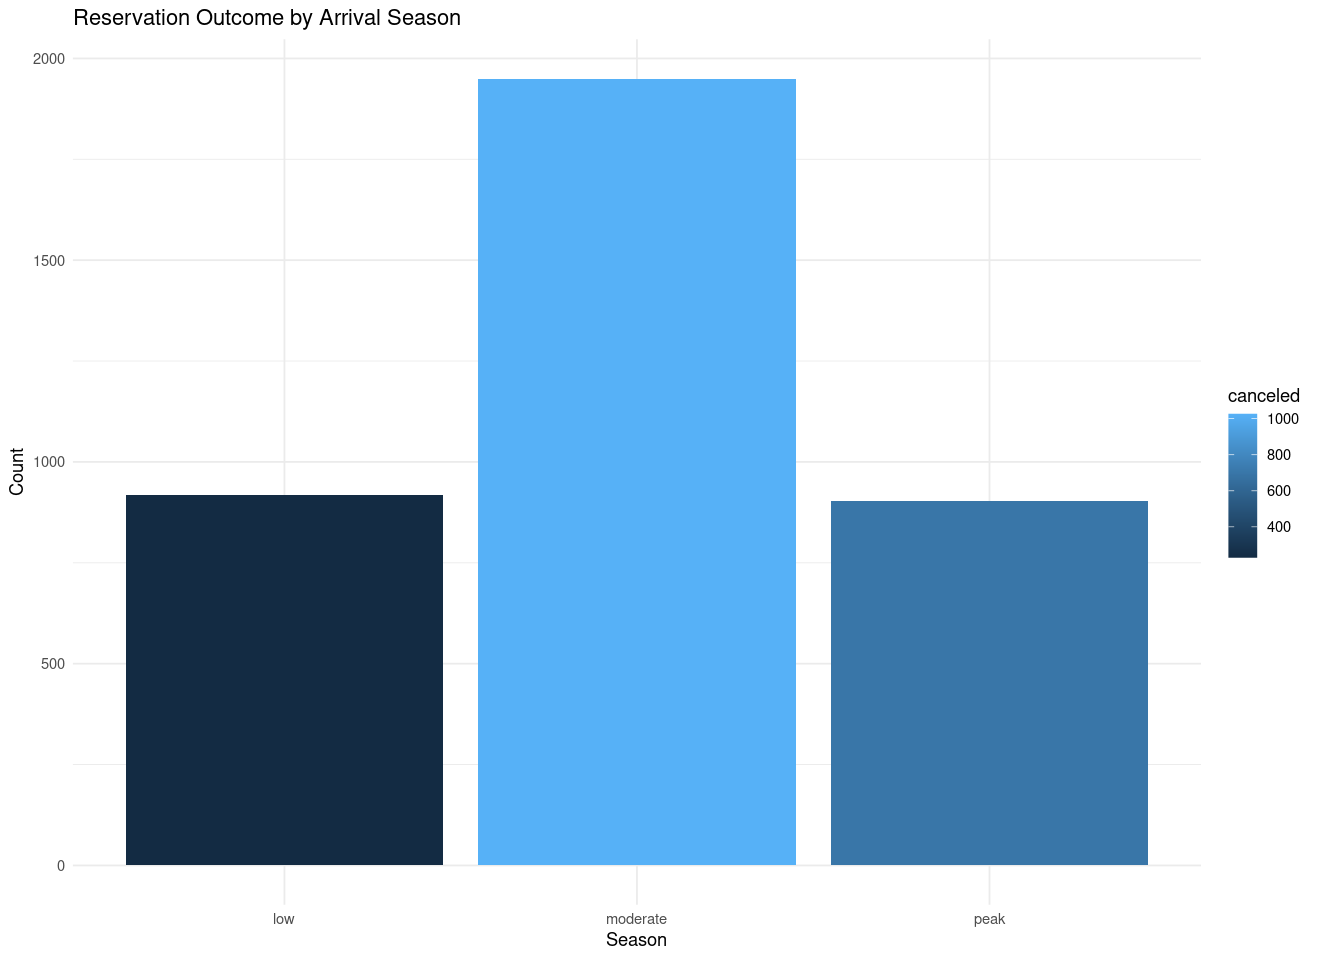

In [13]:
# Load the necessary libraries
library(dplyr)
library(ggplot2)

# Summary data frame
season_summary <- bookings_df %>%
  group_by(arrival_occupancy_season, booking_status) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  pivot_wider(names_from = booking_status, values_from = count, values_fill = 0)

# Bar chart
ggplot(season_summary, aes(x = arrival_occupancy_season, y = `not_canceled`, fill = `canceled`)) +
  geom_bar(stat = "identity") +
  labs(title = "Reservation Outcome by Arrival Season",
       x = "Season", y = "Count") +
  theme_minimal()











In [14]:
# Load the necessary libraries
library(dplyr)

# Filter for the top three arrival season types
top_seasons <- bookings_df %>%
  group_by(arrival_occupancy_season) %>%
  summarise(total_count = n()) %>%
  arrange(desc(total_count)) %>%
  head(3) %>%
  select(arrival_occupancy_season)

# Filter the data for the top three arrival season types
filtered_data <- bookings_df %>%
  filter(arrival_occupancy_season %in% top_seasons$arrival_occupancy_season)

# Summary data frame with the ratio
season_summary <- filtered_data %>%
  group_by(arrival_occupancy_season, booking_status) %>%
  summarise(count = n()) %>%
  ungroup() %>%
  pivot_wider(names_from = booking_status, values_from = count, values_fill = 0) %>%
  mutate(ratio = not_canceled / canceled)

# View the summary data frame
season_summary


`summarise()` has grouped output by 'arrival_occupancy_season'. You can
override using the `.groups` argument.


arrival_occupancy_season,canceled,not_canceled,ratio
<fct>,<int>,<int>,<dbl>
low,230,917,3.986957
moderate,1026,1950,1.900585
peak,699,903,1.291845


## Question 5


**Question**:

How does the availability of reserved parking space (yes or no) impact reservation cancellations, and are there observable differences in the cancellation patterns based on parking space reservation status?

**Answer**:

In the plotted graph comparing cancellations based on reserved parking space, a significant pattern emerges. It is evident that customers who opt to reserve parking space have a notably lower likelihood of canceling their reservations. Conversely, customers without parking space reservations exhibit a considerably higher rate of cancellations. Notably, the graph illustrates that nearly 60-70% of successful reservations for non-reserved parking spaces end up being canceled, while in contrast, only 15-20% of successful reservations for reserved parking spaces face cancellations. This stark contrast underscores the importance of parking space reservations in securing bookings, with significant implications for reservation management and customer satisfaction. It demonstrates the value of providing parking options to customers, influencing the overall success of their reservations.

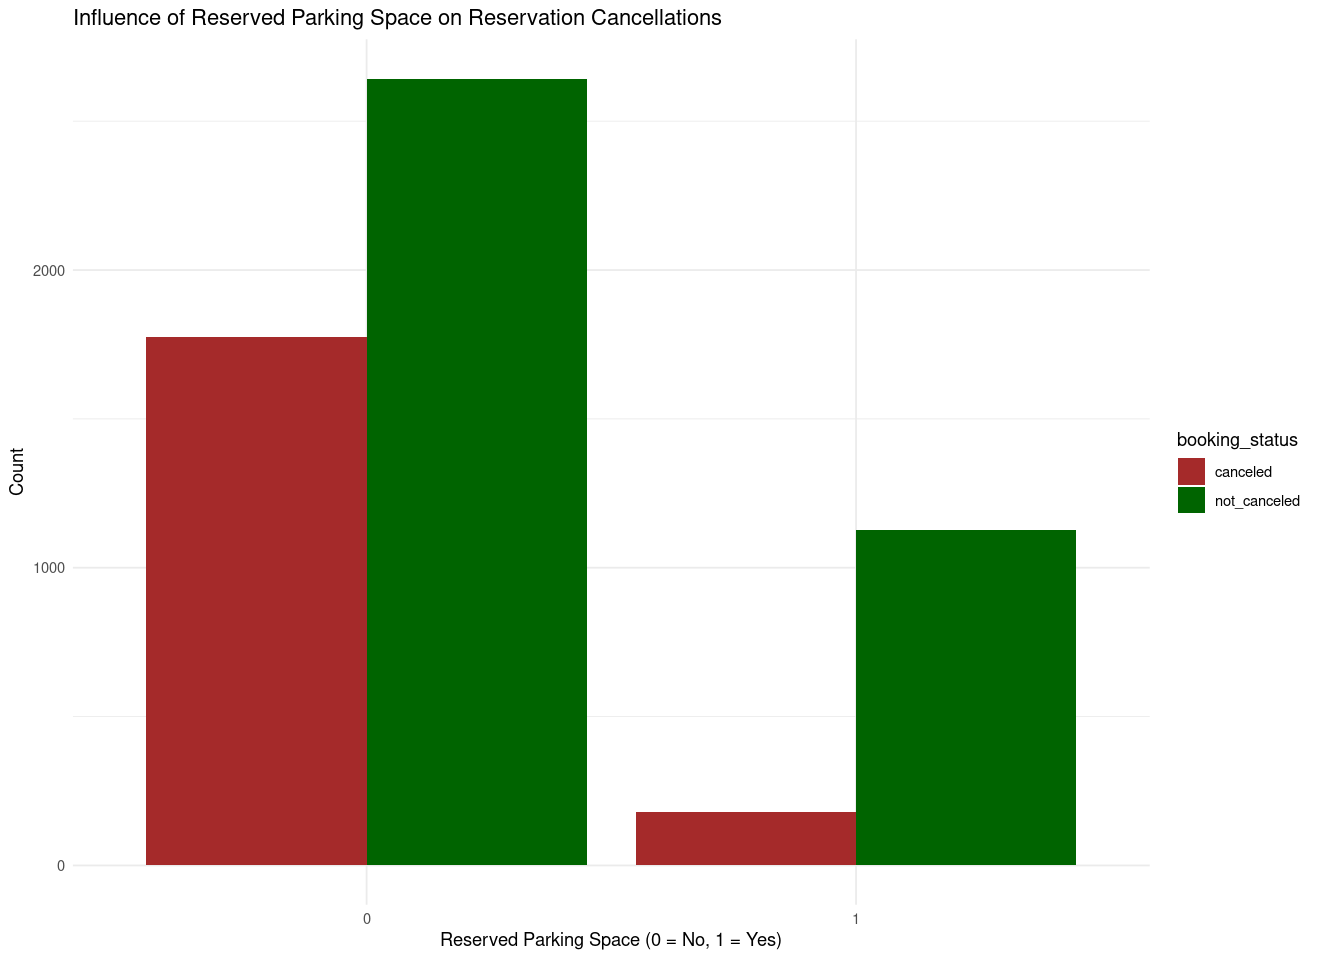

In [15]:
# Load necessary libraries
library(ggplot2)

# Create a grouped bar chart
ggplot(bookings_df, aes(x = as.factor(reserved_parking_space), fill = booking_status)) +
  geom_bar(position = "dodge") +
  labs(title = "Influence of Reserved Parking Space on Reservation Cancellations",
       x = "Reserved Parking Space (0 = No, 1 = Yes)", y = "Count") +
  scale_fill_manual(values = c("not_canceled" = "darkgreen", "canceled" = "brown")) +
  theme_minimal()












## Supporting Analysis


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`booking_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `bookings_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [16]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [4]:
library(caret)
library(dplyr)
library(parsnip)
library(yardstick)
library(workflows)
library(tidymodels)
library(caret)
library(caTools)

set.seed(123)  
split_data <- initial_split(bookings_df, prop = 0.8)  
train_data <- training(split_data)
test_data <- testing(split_data)

In [10]:
install.packages("parsnip")

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/parsnip_1.1.1.tar.gz' ...
	OK [downloaded 1.3 Mb in 0.8 secs]
Installing parsnip [1.1.1] ...
	OK [installed binary]
Moving parsnip [1.1.1] into the cache ...
	OK [moved to cache in 0.27 milliseconds]


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [11]:
bookings_recipe <- recipe(booking_status ~ ., data = train_data) %>%
  step_normalize(all_numeric()) %>%
  step_dummy(all_nominal(), -all_outcomes())  
bookings_recipe






── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 14



── Operations 

• Centering and scaling for: all_numeric()

• Dummy variables from: all_nominal(), -all_outcomes()



## Model 1 Training

In [20]:
model_1 <- logistic_reg() %>%
   set_engine("glm")

workflow_1 <- workflow() %>%
  add_recipe(bookings_recipe) %>%
  add_model(model_1)

trained_workflow_1 <- fit(workflow_1, data = train_data)

## Model 1 Performance Evaluation

In [21]:
class_predict <- predict(trained_workflow_1, new_data = test_data, type = 'class')

prob_predicts <- predict(trained_workflow_1, new_data = test_data, type = 'prob')

roc_bookings_wf_logreg <- test_data %>%
  select(booking_status) %>%
  bind_cols(class_predict, prob_predicts) 

store <- roc_bookings_wf_logreg %>% roc_curve(truth = booking_status, .pred_canceled)

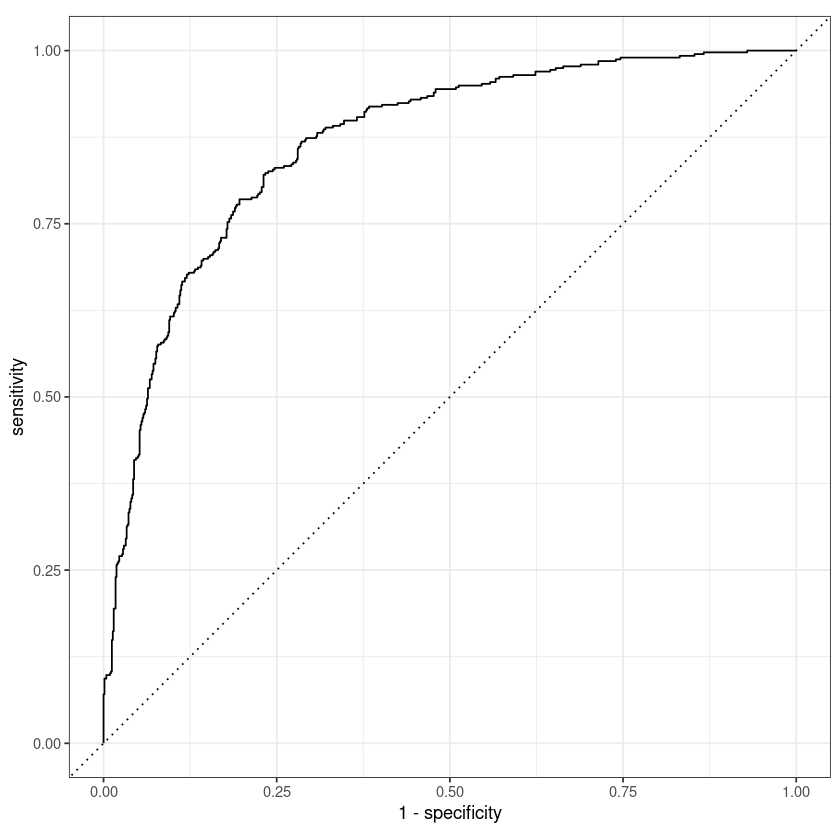

In [22]:
store%>% autoplot()

In [24]:
area_curve_lr<-roc_bookings_wf_logreg%>%roc_auc(truth = booking_status, .pred_canceled)
area_curve_lr

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.865993


## Model 2 Training

In [26]:
model_2 <- rand_forest()%>%
	set_engine("ranger")%>%
	set_mode("classification")

workflow_2 <- workflow() %>%
  add_recipe(bookings_recipe) %>%
  add_model(model_2)
trained_workflow_2 <- fit(workflow_2, data = train_data)

## Model 2 Performance Evaluation

In [29]:
class_predict<- predict(trained_workflow_2,new_data=test_data,type='class')

prob_predicts<-predict(trained_workflow_2,new_data=test_data,type='prob')

roc_bookings_wf_logreg <- test_data %>%
  select(booking_status) %>%
  bind_cols(class_predict,prob_predicts) 

store_2<-roc_bookings_wf_logreg%>% roc_curve(truth = booking_status, .pred_canceled)

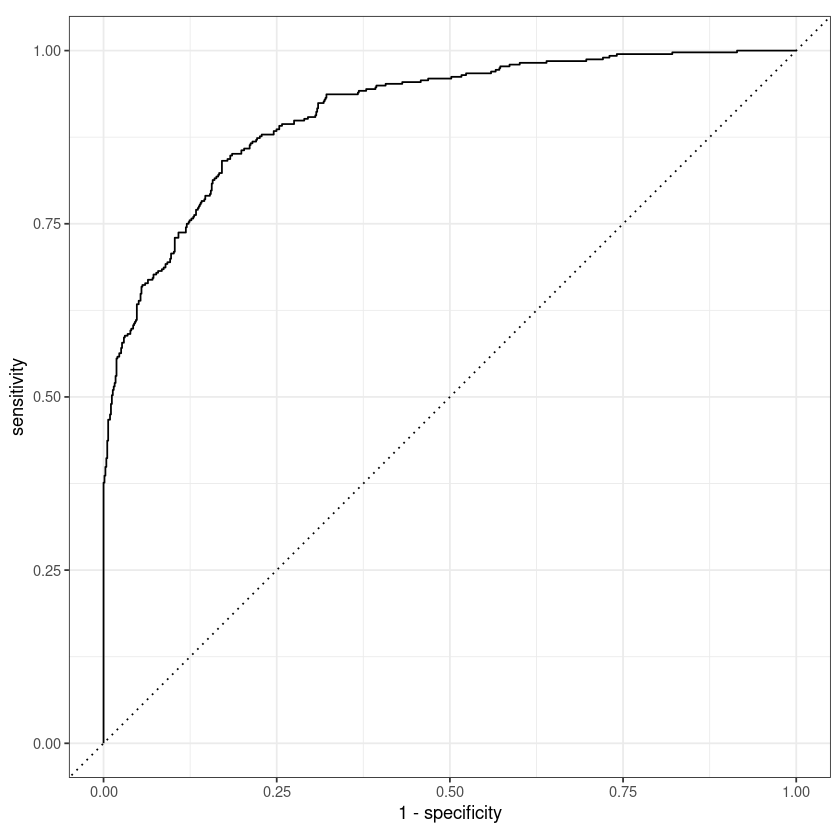

In [30]:
store_2%>% autoplot()

In [31]:
area_curve_randf<-roc_bookings_wf_logreg%>%roc_auc(truth = booking_status, .pred_canceled)
area_curve_randf

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.9119061


## Model 3 Training

In [32]:
model_3 <- decision_tree()%>%
	set_engine("rpart")%>%
	set_mode("classification")
workflow_3 <- workflow() %>%
  add_recipe(bookings_recipe) %>%
  add_model(model_3)
trained_workflow_3 <- fit(workflow_3, data = train_data)

## Model 3 Performance Evaluation

In [34]:
class_predict<- predict(trained_workflow_3,new_data=test_data,type='class')

prob_predicts<-predict(trained_workflow_3,new_data=test_data,type='prob')

roc_bookings_wf_logreg <- test_data %>%
  select(booking_status) %>%
  bind_cols(class_predict,prob_predicts) 

store_3<-roc_bookings_wf_logreg%>% roc_curve(truth = booking_status, .pred_canceled)

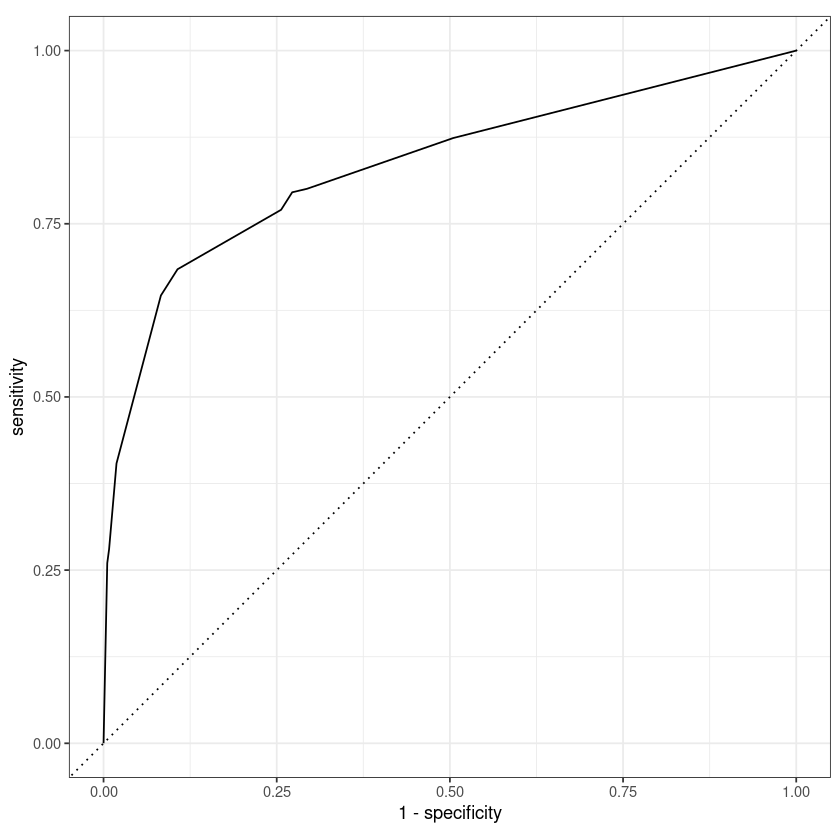

In [35]:
store_3%>% autoplot()

In [36]:
area_curve_dec_tree<-roc_bookings_wf_logreg%>%roc_auc(truth = booking_status, .pred_canceled)
area_curve_dec_tree

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8337076


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the hotel. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and services at the hotel.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a hotel with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

In the realm of hotel reservations and hospitality management, data visualization plays a pivotal role in uncovering meaningful insights and informing strategic decisions. The visualizations we have created in this analysis offer a comprehensive view of various factors influencing the reservation process, cancellation patterns, and the impact of different variables on booking outcomes. Through these visualizations, we explore the intricate relationship between factors such as room type, lead time, arrival season, parking reservations, and room price with the likelihood of reservation cancellations. By examining the graphical representations, we gain valuable insights into the dynamics of reservation behavior, the influence of seasonality, and the significance of customer preferences, paving the way for informed choices in hotel management, pricing strategies, and customer satisfaction enhancements. These visualizations stand as powerful tools in the journey of optimizing hotel reservation services and enhancing the guest experience.



## Key Findings

Certainly! Here are the five key findings from the given analyses:

1.Negative Correlation: Special Requests and Lead Time:
There is a negative correlation between the number of special requests and lead time.
As lead time extends, the number of special requests tends to decline, potentially impacting cancellations.

2.Room Price and Number of Children:
A positive correlation exists between room price and the number of children.
Room pricing appears to influence family booking decisions with children.

3.Room Type Analysis:
The "Suite" room type experiences a significant number of cancellations, possibly due to its popularity.
The "Executive Suite" stands out with a high cancellation ratio of 0.96, indicating a higher likelihood of cancellations compared to other room types.

4.Seasonal Impact on Cancellations:
The moderate season exhibits a high cancellation count, likely due to a larger volume of bookings during that season.
Calculating cancellation ratios reveals that during the low season, the cancellation rate is notably low, while the peak season witnesses a higher cancellation rate, emphasizing the impact of seasonality on booking behavior.

5.Room Price and Lead Days Relationship:
Reservations made within 0-100 days in advance exhibit lower cancellation rates.
As room prices increase and lead times extend beyond this range, the rate of cancellations rises.


## Modeling Results

Among the models evaluated, the Random Forest model performed the best with an area under the ROC curve (AUC) of 0.9119 on the test data. This model demonstrated strong predictive capability in identifying customers are tend to cancel the reservations.


## Recommendations

Certainly, here are five generalized recommendations based on the key findings:

1.Optimize Booking Window Management:
Encourage customers to book their reservations within a reasonable lead time (e.g., 0-100 days in advance) to reduce the likelihood of cancellations. Consider offering incentives or promotions for early bookings.

2.Pricing Strategies for Room Types:
Tailor pricing strategies for different room types. For room types with higher cancellation rates, such as "Suite" and "Executive Suite," consider dynamic pricing, flexible cancellation policies, or promotional offers to reduce cancellations.

3.Enhance Special Request Handling:
Focus on improving the handling of special requests for customers with longer lead times. By maintaining a high level of service and responsiveness, you can potentially retain customers who might otherwise cancel due to evolving needs.

4.Seasonal Marketing and Policies:
Implement season-specific marketing campaigns and policies. During peak seasons, offer value-added services or discounts to incentivize customers to commit to their bookings. In contrast, during low seasons, emphasize exclusivity and tranquility to attract early reservations.

5.Promote Reserved Parking Space:
Emphasize the option to reserve parking space when promoting your accommodations. The data suggests that this feature significantly reduces cancellations. Promote it as a valuable service that enhances the overall guest experience.

These recommendations are designed to help optimize the hotel's revenue, occupancy rates, and overall customer satisfaction. By implementing strategies tailored to the findings, the hotel can effectively manage and reduce reservation cancellations, resulting in improved booking status outcomes.
